## Plant Disease Detection



* The rate of plants and crops cultivation is growing rapidly with the    increment of human and animal demands all over the world. 
* The agricultural science invented lots of authentic techniques to use in cultivation sector for improve the production rate. 
* During cultivation, farmers faced lots of challenges to protect their plant form different diseases and insects which make their production lower and they faced much financial losses.
* To prevent these losses and provide immediate cure, we are using CNN (Convolutional Neural Network) model and other transfer learning algorithms to train the dataset for image processing which will help to identify different types of disease of plant.
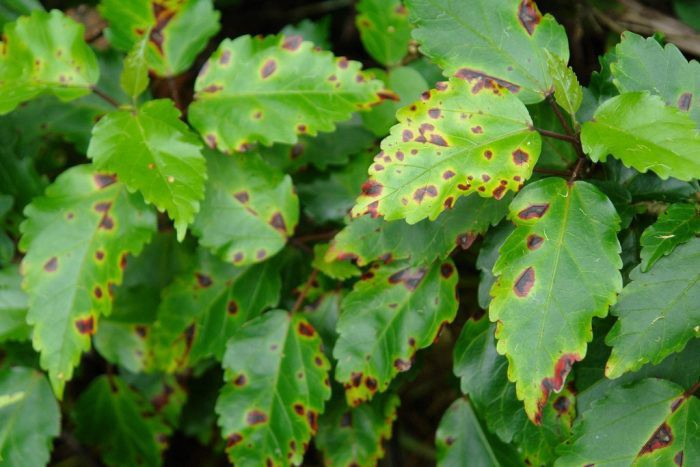


# Import Packages

Let's first import all the packages that we will need like numpy, pandas, os, cv2, seaborn, keras, tensorflow, etc.


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm 
import seaborn as sns
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils  import  to_categorical
import plotly.graph_objects as go
from keras.models import Model,Sequential, Input, load_model
from keras.applications import DenseNet121,VGG16,MobileNet,VGG19,ResNet50
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.python.keras import regularizers
from keras.regularizers import l2
from tensorflow.keras import models,layers
from keras.layers import Dense,InputLayer,Activation,MaxPooling2D, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

#Mount google drive

Here, I have mounted google drive to extract dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive/archive (1).zip'

'/content/gdrive/My Drive/archive (1).zip'


#Unzip dataset folder (archive.zip)

Here, we will unzip the dataset folder.

In [ ]:
!unzip '/content/gdrive/My Drive/archive (1).zip'

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

#Data Preprocessing

Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format. 

Preprocessing data is a common first step in the deep learning workflow to prepare raw data in a format that the network can accept. 

For example, you can resize image input to match the size of an image input layer. 

You can also preprocess data to enhance desired features or reduce artifacts that can bias the network.

Steps Involved in Data Preprocessing:

1) Load dataset

2) Resize image to target size

3) Normalize images

4) Split the dataset into train and validation sets


**This dataset consist of 15 different classes of plant disease of Bell pepper, Tomato and Potato.**

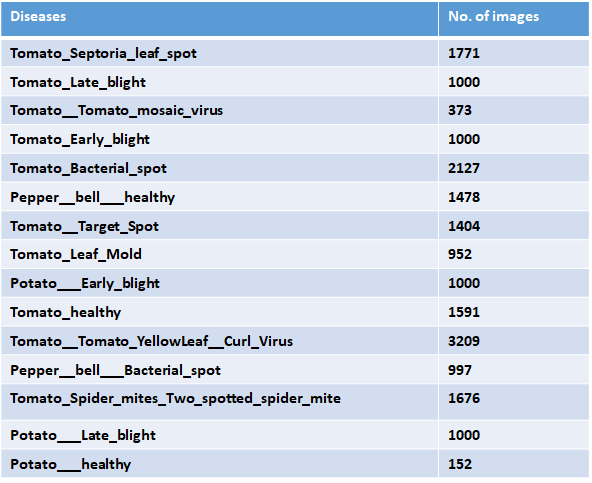

**Dataset link:** https://www.kaggle.com/emmarex/plantdisease

In [ ]:
#Load dataset
names = os.listdir('/content/PlantVillage')
names

['Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato__Tomato_mosaic_virus',
 'Potato___Late_blight',
 'Potato___healthy',
 'Potato___Early_blight',
 'Tomato_Early_blight',
 'Tomato_Bacterial_spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Leaf_Mold',
 'Tomato__Target_Spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Septoria_leaf_spot',
 'Pepper__bell___healthy',
 'Pepper__bell___Bacterial_spot']

In [ ]:
#Assigning all 15 differnt disease into disease_types variable
disease_types = ['Tomato_Septoria_leaf_spot',
 'Tomato_Late_blight',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Early_blight',
 'Tomato_Bacterial_spot',
 'Pepper__bell___healthy',
 'Tomato__Target_Spot',
 'Tomato_Leaf_Mold',
 'Potato___Early_blight',
 'Tomato_healthy',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Potato___Late_blight',
 'Potato___healthy']
data_dir = '/content/PlantVillage'
train_dir = os.path.join(data_dir)

In [ ]:
#storing File Name, DiseaseID and Disease Type of all the images in dataframe
train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])

# Randomize the order of training set
SEED = 42
train = train.sample(frac=1, random_state=SEED) 
train.index = np.arange(len(train)) # Reset indices
train.head()

File  ...          Disease Type
0  Potato___Late_blight/cd413b65-05b0-4bbd-9896-4...  ...  Potato___Late_blight
1  Tomato_Late_blight/57562e67-9700-477f-9a67-a3c...  ...    Tomato_Late_blight
2  Tomato_healthy/283a4ff6-4a72-498d-b5fc-df970b8...  ...        Tomato_healthy
3  Potato___Late_blight/ea542556-e7f6-416c-8451-1...  ...  Potato___Late_blight
4  Tomato__Target_Spot/225b37a6-449f-4436-92be-ae...  ...   Tomato__Target_Spot

[5 rows x 3 columns]

In [ ]:
#Plotting Pie chart for all 15 classes
fig = go.Figure(
    data=[go.Pie(labels=['Tomato_Septoria_leaf_spot',
 'Tomato_Late_blight',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Early_blight',
 'Tomato_Bacterial_spot',
 'Pepper__bell___healthy',
 'Tomato__Target_Spot',
 'Tomato_Leaf_Mold',
 'Potato___Early_blight',
 'Tomato_healthy',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Potato___Late_blight',
 'Potato___healthy'],
        values=[len(os.listdir('/content/PlantVillage/Tomato_Septoria_leaf_spot')),
                len(os.listdir('/content/PlantVillage/Tomato_Late_blight')),
                len(os.listdir('/content/PlantVillage/Tomato__Tomato_mosaic_virus')),
                len(os.listdir('/content/PlantVillage/Tomato_Early_blight')),
                len(os.listdir('/content/PlantVillage/Tomato_Bacterial_spot')),
                len(os.listdir('/content/PlantVillage/Pepper__bell___healthy')),
                len(os.listdir('/content/PlantVillage/Tomato_Leaf_Mold')),
                len(os.listdir('/content/PlantVillage/Tomato__Target_Spot')),
                len(os.listdir('/content/PlantVillage/Potato___Early_blight')),
                len(os.listdir('/content/PlantVillage/Tomato_healthy')),
                len(os.listdir('/content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus')),
                len(os.listdir('/content/PlantVillage/Pepper__bell___Bacterial_spot')),
                len(os.listdir('/content/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite')),
                len(os.listdir('/content/PlantVillage/Potato___Late_blight')),
                len(os.listdir('/content/PlantVillage/Potato___healthy'))])
])
fig.show()



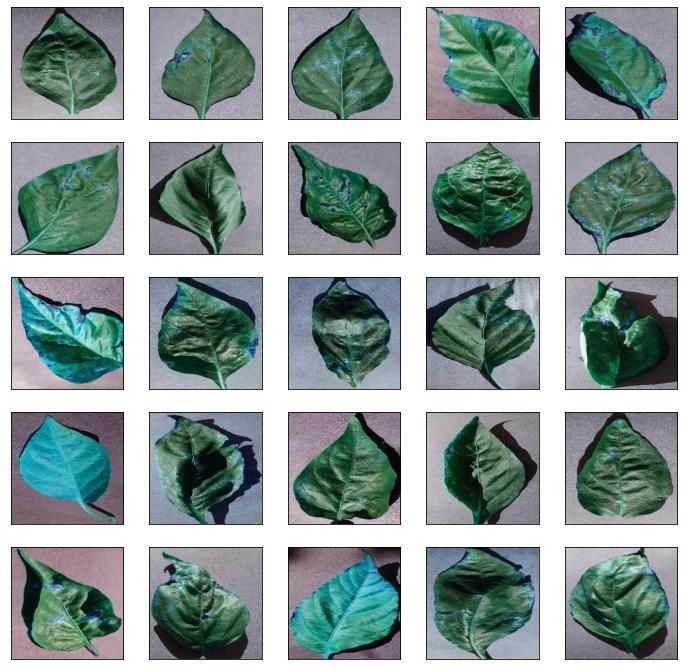

In [ ]:
# Display images for different species(e.g. Pepper__bell___Bacterial_spot)
def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = train['File'][train['Disease Type'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_defects('Pepper__bell___Bacterial_spot', 5, 5)

In [ ]:
# Resize image to target size
IMAGE_SIZE = 64
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) # Loading a color image is the default flag

def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [ ]:
#Reading all the 20k images and normalize it
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
        
# Normalize the data
X_Train = X_train / 255.
print('Train Shape: {}'.format(X_Train.shape))

20639it [00:26, 787.48it/s]


Train Shape: (20639, 64, 64, 3)


In [ ]:
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=15)

In [ ]:
# Split the dataset into train and validation sets and batch size = 64
BATCH_SIZE = 64
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.2, random_state=SEED)

In [ ]:
#Display shapes of train and validation sets
print('X train shape',X_train.shape)
print('Y train shape',Y_train.shape)
print('X val shape',X_val.shape)
print('Y val shape',Y_val.shape)

X train shape (16511, 64, 64, 3)
Y train shape (16511, 15)
X val shape (4128, 64, 64, 3)
Y val shape (4128, 15)


# CNN Model (Convolutional Neural Network)

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

A convolutional neural network (CNN, or ConvNet) is one of the most popular algorithms for deep learning with images and video.

Like other neural networks, a CNN is composed of an input layer, an output layer, and many hidden layers in between.

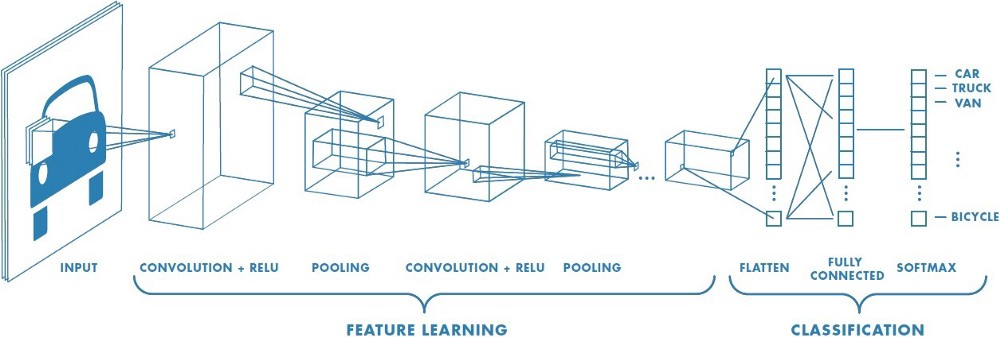

**Reference Links:**
https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53#:~:text=A%20Convolutional%20Neural%20Network%20%28ConvNet%2FCNN%29%20is%20a%20Deep,be%20able%20to%20differentiate%20one%20from%20the%20other.

Here, I have used Convolution layer, Max Pooling, Batch Normalization, Dropout layer, Flatten Layer, Dense layer for building a CNN model

Also, used kernal Regularizer to reduced overfitting

In [ ]:
chanDim = -1
model = models.Sequential()

model.add(layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),
                        activation = 'relu',kernel_regularizer=regularizers.l1_l2(.001)))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis=chanDim))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu',padding="same"))
model.add(BatchNormalization(axis=chanDim))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding="same"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(layers.Dense(1024,activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization(axis=chanDim))
model.add(Dropout(0.5))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(layers.Dense(15,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        3

**Optimizers and Callbacks**

**1) Optimization** is as an important part of deep learning as Neural networks consist of millions of parameters and to handle the complexities it becomes a challenge for researchers so this functionalities of the optimization algorithm are to minimize the loss function by reaching global minima.

The optimizer used is Adam in this model:

**Adam – Adaptive moment estimation**: Adam optimization technique is very popular and used in many models as an optimizer, adam is a combination of RMS prop and momentum, it uses the squared gradient to scale the learning rate parameters like RMSprop and it works similar to the momentum by adding averages of moving gradients. It computes different parameters for individual parameters.




**2) Callbacks** : In Deep Learning models Keras callbacks functions can play a very significant role. The training of such models can take even days to complete so we should have some function to monitor and control our model. Suppose, if the model is getting overfitted we can stop the training or if we have reached at least loss and for next epoch, it gets increased we can again stop the training.

Sometimes due to much complexity in deep learning models, they often get crashed and the training gets stopped. Consider you have already trained it for 3 days and all the training gets wasted. 

To overcome these kinds of situations Keras has several different callbacks functions that can help to get rid of these problems while training the model.

**ModelCheckpoint**: This function of keras callbacks is used to save the model after every epoch. We just need to define a few of the parameters like where we want to store, what we want to monitor and etc. 


**ReduceLROnPlateau**: Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

**EarlyStopping:** This function of Keras callbacks is used to stop the model training in between. This function is very helpful when your models get overfitted. It is used to stop the model as soon as it gets overfitted.

In [ ]:
optimizer = Adam(lr=0.002)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
annealer = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

epochs = 50

CNN_history = model.fit(X_train, Y_train,batch_size =64,
               epochs=epochs,
               verbose=1,
               callbacks=[annealer,checkpoint],
               validation_data=(X_val, Y_val))



Epoch 1/50
258/258 [==============================] - ETA: 0s - loss: 1.8663 - accuracy: 0.6719
Epoch 00001: val_loss improved from inf to 15.84674, saving model to model.h5
258/258 [==============================] - 5s 19ms/step - loss: 1.8663 - accuracy: 0.6719 - val_loss: 15.8467 - val_accuracy: 0.0785
Epoch 2/50
255/258 [============================>.] - ETA: 0s - loss: 1.3544 - accuracy: 0.8088
Epoch 00002: val_loss improved from 15.84674 to 8.84490, saving model to model.h5
258/258 [==============================] - 4s 16ms/step - loss: 1.3530 - accuracy: 0.8092 - val_loss: 8.8449 - val_accuracy: 0.2287
Epoch 3/50
257/258 [============================>.] - ETA: 0s - loss: 1.1982 - accuracy: 0.8498
Epoch 00003: val_loss improved from 8.84490 to 2.09473, saving model to model.h5
258/258 [==============================] - 4s 16ms/step - loss: 1.1989 - accuracy: 0.8499 - val_loss: 2.0947 - val_accuracy: 0.6451
Epoch 4/50
256/258 [============================>.] - ETA: 0s - loss: 1.08

Text(0.5, 144.41374999999996, 'Predicted')

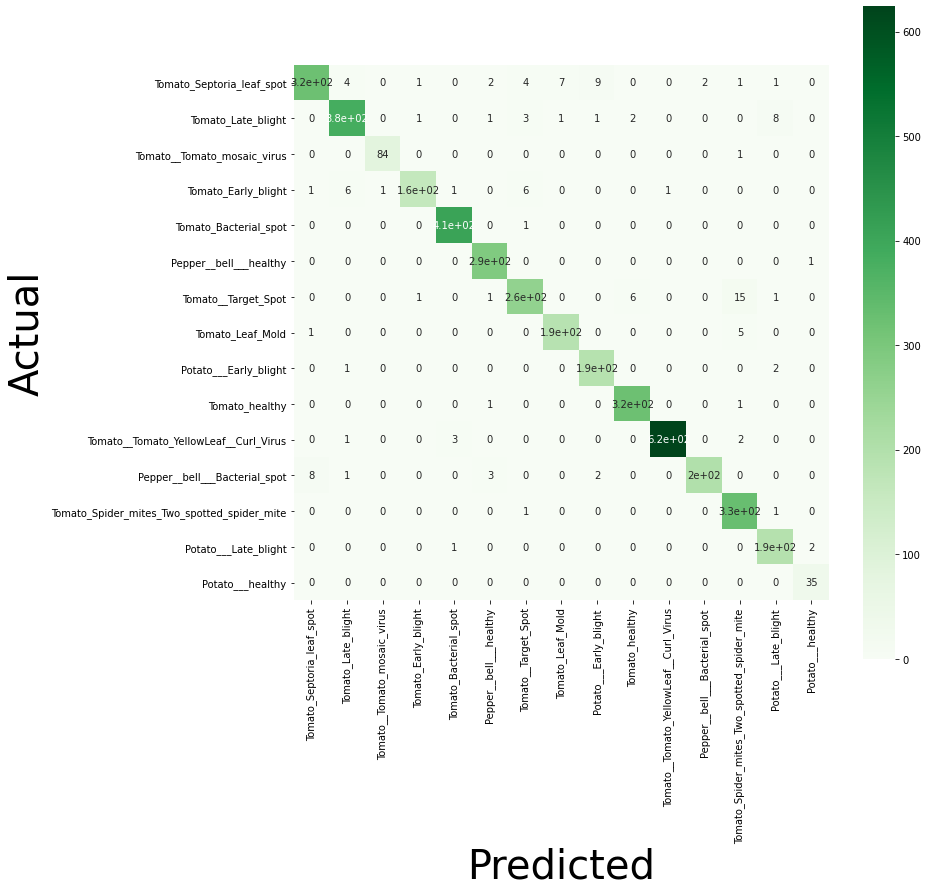

In [ ]:
#Heatmap for all the 15 classes
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

Here we collect the history, returned from training the model and creates two charts:

1)A plot of accuracy on the training and validation datasets over training epochs.

2)A plot of loss on the training and validation datasets over training epochs

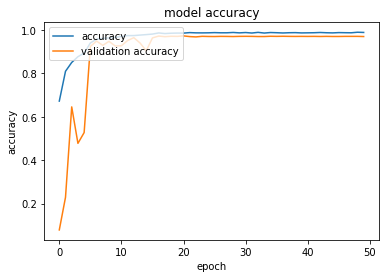

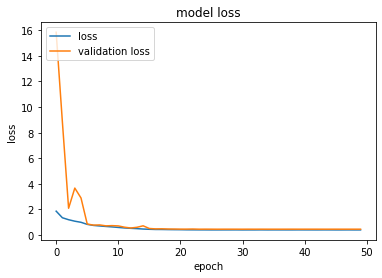

In [ ]:
# plot for summarize history of accuracy 
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='upper left')
plt.show()

# plot for summarize history of loss
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

In [ ]:
#calculating model accuracy
print("[INFO] Calculating model accuracy")
scores = model.evaluate(X_val, Y_val)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
129/129 [==============================] - 1s 5ms/step - loss: 0.4590 - accuracy: 0.9692
Test Accuracy: 96.92344665527344


# Transfer Learning

Transfer learning is the reuse of a pre-trained model on a new problem. 

It's currently very popular in deep learning because it can train deep neural networks with comparatively little data. 

This is very useful in the data science field since most real-world problems typically do not have millions of labeled data points to train such complex models. 

With transfer learning, we basically try to exploit what has been learned in one task to improve generalization in another. We transfer the weights that a network has learned at "task A" to a new "task B."

In computer vision, for example, neural networks usually try to detect edges in the earlier layers, shapes in the middle layer and some task-specific features in the later layers. In transfer learning, the early and middle layers are used and we only retrain the latter layers. It helps leverage the labeled data of the task it was initially trained on.

Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

**Reference Link**: https://keras.io/api/applications/

## 1)**DenseNet**

DenseNet is one of the new discoveries in neural networks for visual object recognition.

DenseNet is quite similar to ResNet with some fundamental differences.

ResNet uses an additive method (+) that merges the previous layer (identity) with the future layer, whereas DenseNet concatenates (.) the output of the previous layer with the future layer.

DenseNet was developed specifically to improve the declined accuracy caused by the vanishing gradient in high-level neural networks.

In simpler terms, due to the longer path between the input layer and the output layer, the information vanishes before reaching its destination.

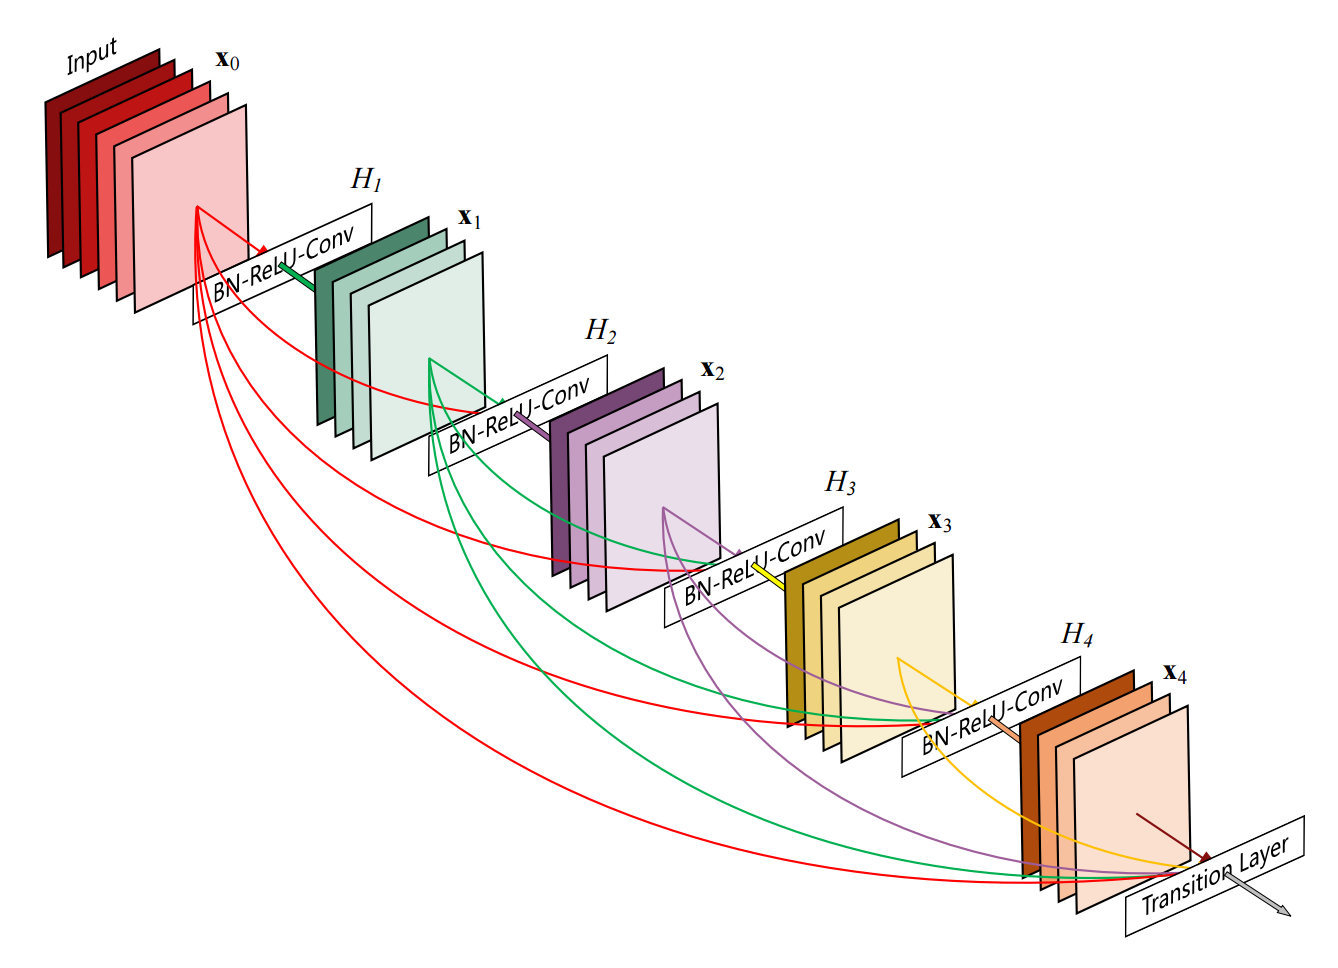


In [ ]:
EPOCHS = 60
SIZE=64
N_ch=3
def build_densenet():
    densenet = DenseNet121(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = densenet(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(15,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)

    #optimizer : Adam
    optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
model = build_densenet()

#used callbacks like ReduceLROnPlateau and ModelCheckpoint
annealer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)

# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))

29089792/29084464 [==============================] - 0s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 3)         84        
_________________________________________________________________
densenet121 (Functional)     (None, None, None, 1024)  7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_______________________________________________________

In [ ]:
#calculate model accuracy
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

129/129 [==============================] - 2s 15ms/step - loss: 0.1156 - accuracy: 0.9688
Final Loss: 0.11561687290668488, Final Accuracy: 0.96875


Text(0.5, 144.41374999999996, 'Predicted')

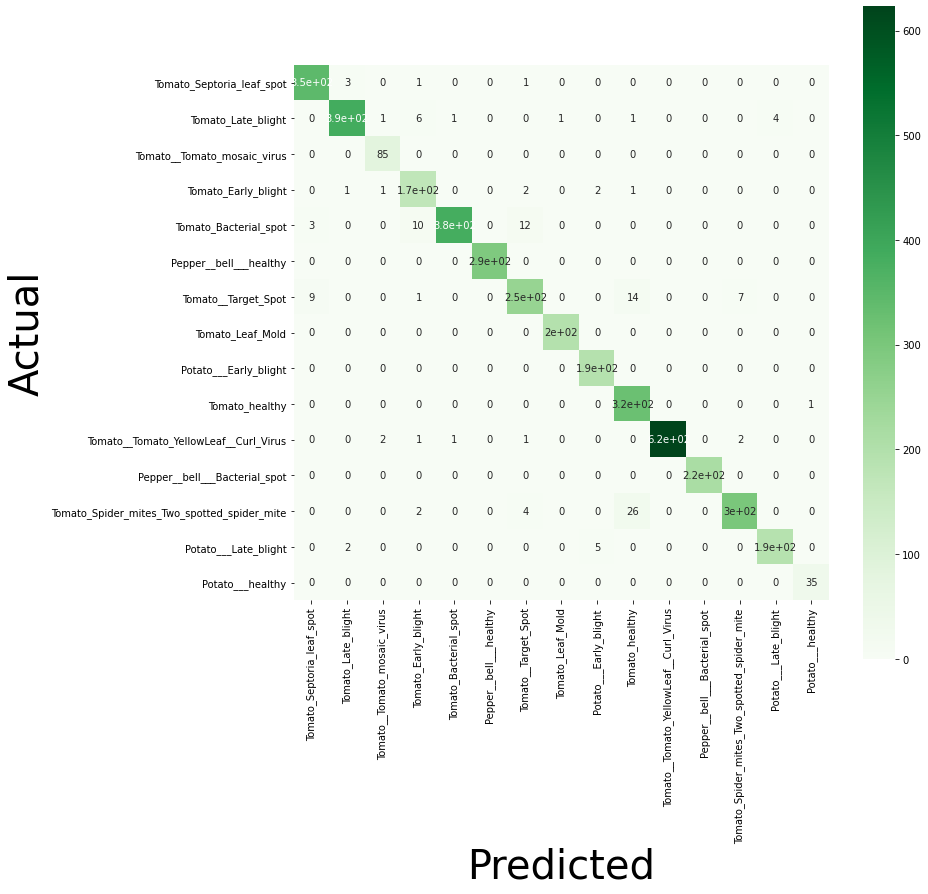

In [ ]:
#HeatMap
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

Here we collect the history, returned from training the model and creates two charts:

1)A plot of accuracy on the training and validation datasets over training epochs.

2)A plot of loss on the training and validation datasets over training epochs

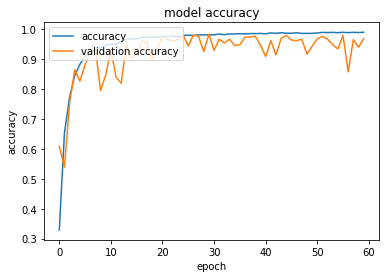

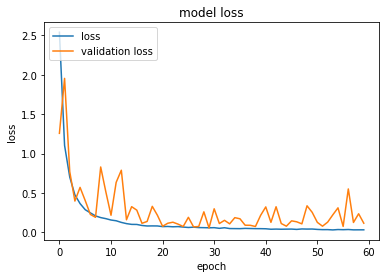

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

## 2)MobileNet

MobileNets are based on a streamlined architecture that uses depth-wise separable convolutions to build light weight deep neural networks.

The effectiveness of MobileNets across a wide range of applications and use cases includes object detection, finegrain classification, face attributes and large scale geo-localization.

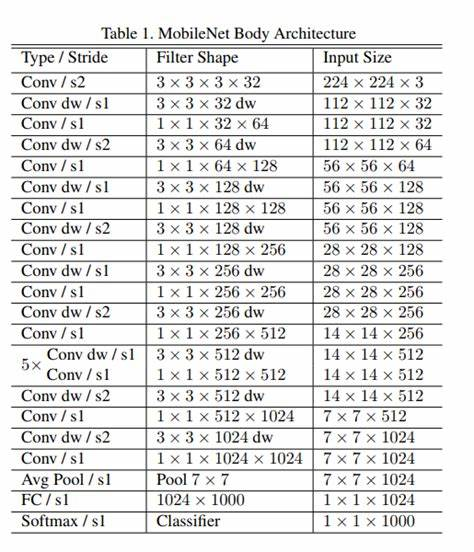

In [ ]:
# Split the train and validation sets 
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.4, random_state=SEED)

In [ ]:
print('X train shape',X_train.shape)
print('Y train shape',Y_train.shape)
print('X val shape',X_val.shape)
print('Y val shape',Y_val.shape)

X train shape (12383, 64, 64, 3)
Y train shape (12383, 15)
X val shape (8256, 64, 64, 3)
Y val shape (8256, 15)


In [ ]:
MobileNet_base_model = MobileNet(
    weights="imagenet",  # load weights pretrained on the ImageNet
    input_shape=(224, 224, 3),
    include_top=False  # do not include the ImageNet classifier at the top
) 

In [ ]:
MobileNet_base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [ ]:
# Freeze the base_model
MobileNet_base_model.trainable = False

# Create new model on top
inputs = Input(shape=(224, 224, 3))

#Adding layers
x = MobileNet_base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)  # Regularize with dropout
x = BatchNormalization()(x)
x = Dense(64,activation='relu',kernel_regularizer=l2(0.001))(x)

#multi output
outputs = Dense(15,activation='softmax')(x)

mobilenet_model = Model(inputs, outputs, name='pretrained_mobilenet')

#optimizer:Adam
optimizer = Adam(lr=0.002)
mobilenet_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
mobilenet_model.summary()

Model: "pretrained_mobilenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dense_1 (Dense)              (None, 15)       

In [ ]:
#Adding callbacks and 50 epochs
annealer = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1)
earlystopping = EarlyStopping(monitor = 'val_loss',patience =2,verbose=1)
checkpoint = ModelCheckpoint('MobileNet.h5', verbose=1, save_best_only=True)
epochs = 30

#Fits the model on 64 batches
mobilenet_history = mobilenet_model.fit(X_train,Y_train,batch_size=64,
                                        validation_data=(X_val,Y_val),
                                        epochs=epochs,
                                        callbacks=[annealer,earlystopping,checkpoint],
                                        verbose = 1
)

Epoch 1/30
194/194 [==============================] - ETA: 0s - loss: 1.3378 - accuracy: 0.6162WARNING:tensorflow:Model was constructed with shape (None, 224, 224, 3) for input Tensor("input_2:0", shape=(None, 224, 224, 3), dtype=float32), but it was called on an input with incompatible shape (64, 64, 64, 3).

Epoch 00001: val_loss improved from inf to 0.86534, saving model to MobileNet.h5
194/194 [==============================] - 4s 20ms/step - loss: 1.3378 - accuracy: 0.6162 - val_loss: 0.8653 - val_accuracy: 0.7607
Epoch 2/30
191/194 [============================>.] - ETA: 0s - loss: 0.9015 - accuracy: 0.7436
Epoch 00002: val_loss improved from 0.86534 to 0.80869, saving model to MobileNet.h5
194/194 [==============================] - 3s 15ms/step - loss: 0.9016 - accuracy: 0.7434 - val_loss: 0.8087 - val_accuracy: 0.7779
Epoch 3/30
189/194 [============================>.] - ETA: 0s - loss: 0.8356 - accuracy: 0.7654
Epoch 00003: val_loss improved from 0.80869 to 0.78101, saving mod

In [ ]:
#calculating model accuracy
final_loss, final_accuracy = mobilenet_model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

258/258 [==============================] - 2s 6ms/step - loss: 0.7813 - accuracy: 0.8054
Final Loss: 0.7813065052032471, Final Accuracy: 0.8053537011146545


Here we collect the history, returned from training the model and creates two charts:

1)A plot of accuracy on the training and validation datasets over training epochs.

2)A plot of loss on the training and validation datasets over training epochs

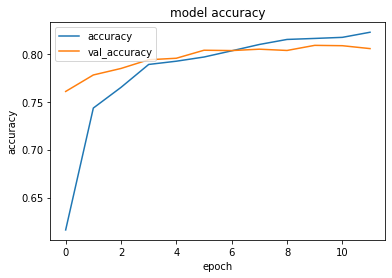

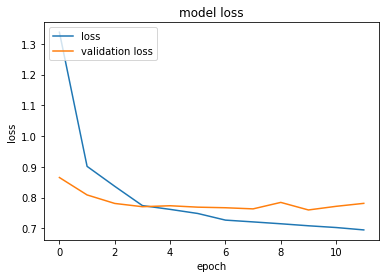

In [ ]:
# accuracy plot 
plt.plot(mobilenet_history.history['accuracy'])
plt.plot(mobilenet_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

# loss plot
plt.plot(mobilenet_history.history['loss'])
plt.plot(mobilenet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

In [ ]:
mobilenet_model.save('mobilenetModel')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mobilenetModel/assets


## 3)VGG 16

VGGNet is invented by VGG (Visual Geometry Group),an academic group (Simonyan and Zisserman) focused on computer vision from University of Oxford. 

VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR (Imagenet) competition in 2014.

It is considered to be one of the excellent vision model architecture till date.

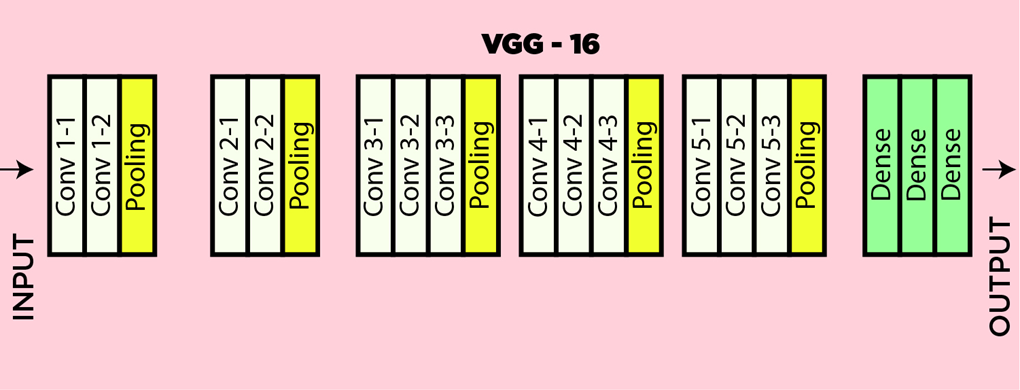



In [ ]:
# Split the train and validation sets 
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.4, random_state=SEED)

In [ ]:
print('X train shape',X_train.shape)
print('Y train shape',Y_train.shape)
print('X val shape',X_val.shape)
print('Y val shape',Y_val.shape)

X train shape (12383, 64, 64, 3)
Y train shape (12383, 15)
X val shape (8256, 64, 64, 3)
Y val shape (8256, 15)


In [ ]:
VGG16_base_model = VGG16(
    weights="imagenet",  # load weights pretrained on the ImageNet
    input_shape=(224, 224, 3),
    include_top=False  # do not include the ImageNet classifier at the top
) 

In [ ]:
VGG16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# Freeze the base_model
VGG16_base_model.trainable = False

# Create new model on top
inputs = Input(shape=(224, 224, 3))

#Adding layers
x = VGG16_base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu',kernel_regularizer=regularizers.l1_l2(.001))(x)
x = Dense(64,activation='relu',kernel_regularizer=regularizers.l1_l2(.001))(x)
x = Dense(32,activation='relu',kernel_regularizer=regularizers.l1_l2(.001))(x)

#multi output
outputs = Dense(15,activation='softmax')(x)

VGG16_model = Model(inputs, outputs, name='pretrained_mobilenet')

#optimizer:Adam
optimizer = Adam(lr=0.002)
VGG16_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

VGG16_model.summary()

Model: "pretrained_mobilenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 15)       

In [ ]:
#Adding callbacks and 50 epochs
annealer = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1)
earlystopping = EarlyStopping(monitor = 'val_loss',patience =2,verbose=1)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
epochs = 50

#Fits the model on 64 batches
VGG16_history = VGG16_model.fit(X_train,Y_train,batch_size=64,
                                        validation_data=(X_val,Y_val),
                                        epochs=epochs,
                                        callbacks=[annealer,earlystopping,checkpoint],
                                        verbose = 1
)

Epoch 1/50
194/194 [==============================] - ETA: 0s - loss: 3.3874 - accuracy: 0.4150WARNING:tensorflow:Model was constructed with shape (None, 224, 224, 3) for input Tensor("input_2:0", shape=(None, 224, 224, 3), dtype=float32), but it was called on an input with incompatible shape (64, 64, 64, 3).

Epoch 00001: val_loss improved from inf to 2.27544, saving model to model.h5
194/194 [==============================] - 9s 44ms/step - loss: 3.3874 - accuracy: 0.4150 - val_loss: 2.2754 - val_accuracy: 0.4984
Epoch 2/50
192/194 [============================>.] - ETA: 0s - loss: 2.0950 - accuracy: 0.5579
Epoch 00002: val_loss improved from 2.27544 to 1.98826, saving model to model.h5
194/194 [==============================] - 8s 41ms/step - loss: 2.0930 - accuracy: 0.5584 - val_loss: 1.9883 - val_accuracy: 0.5825
Epoch 3/50
192/194 [============================>.] - ETA: 0s - loss: 1.9057 - accuracy: 0.5998
Epoch 00003: val_loss improved from 1.98826 to 1.86031, saving model to mo

In [ ]:
#Calculating model accuracy
print("[INFO] Calculating model accuracy")
scores = VGG16_model.evaluate(X_val, Y_val)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
258/258 [==============================] - 4s 15ms/step - loss: 1.3268 - accuracy: 0.7125
Test Accuracy: 71.24515771865845


Here we collect the history, returned from training the model and creates two charts:

1)A plot of accuracy on the training and validation datasets over training epochs.

2)A plot of loss on the training and validation datasets over training epochs

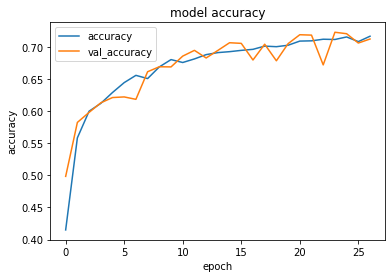

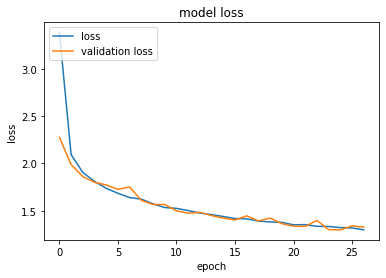

In [ ]:
# accuracy plot 
plt.plot(VGG16_history.history['accuracy'])
plt.plot(VGG16_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

# loss plot
plt.plot(VGG16_history.history['loss'])
plt.plot(VGG16_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

## 4)VGG 19

VGG19 is a similar model architecure as VGG16 with three additional convolutional layers, it consists of a total of 16 Convolution layers and 3 dense layers.

Following is the architecture of VGG19 model. In VGG networks, the use of 3 x 3 convolutions with stride 1 gives an effective receptive filed equivalent to 7 * 7.

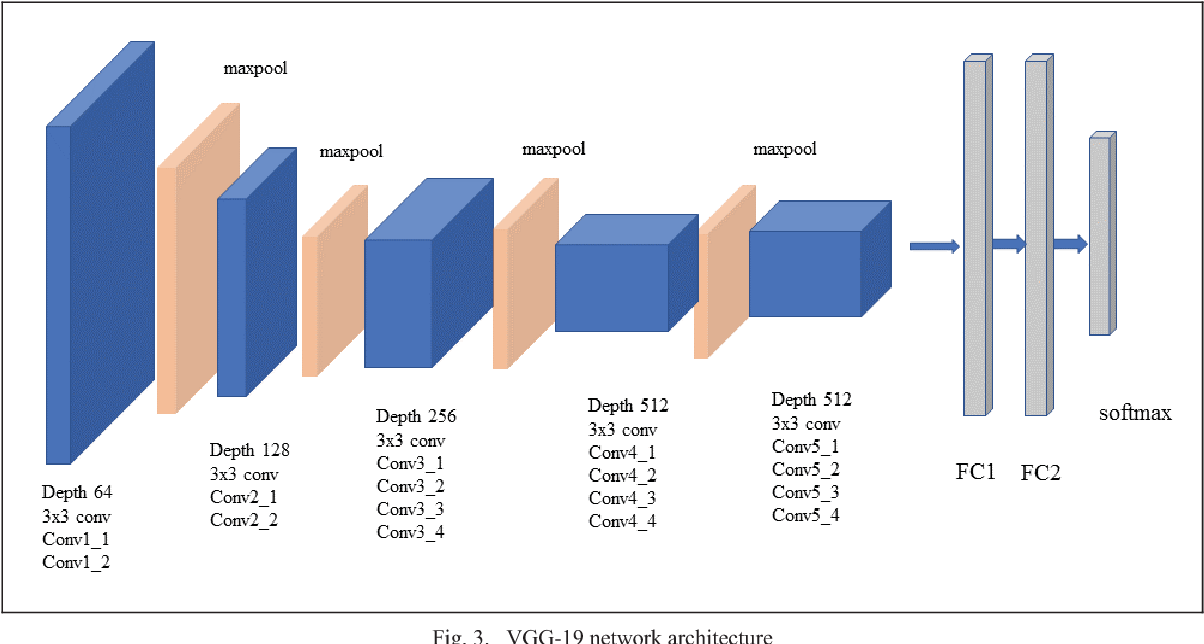

In [ ]:
# Split the train and validation sets 
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.4, random_state=SEED)

In [ ]:
print('X train shape',X_train.shape)
print('Y train shape',Y_train.shape)
print('X val shape',X_val.shape)
print('Y val shape',Y_val.shape)

X train shape (12383, 64, 64, 3)
Y train shape (12383, 15)
X val shape (8256, 64, 64, 3)
Y val shape (8256, 15)


In [ ]:
VGG19_base_model = VGG19(
    weights="imagenet",  # load weights pretrained on the ImageNet
    input_shape=(224, 224, 3),
    include_top=False  # do not include the ImageNet classifier at the top
) 

In [ ]:
VGG19_base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:

# Freeze the base_model
VGG19_base_model.trainable = False
# Create new model on top
inputs = Input(shape=(224, 224, 3))

#Adding layers
x = VGG19_base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128,activation='relu',kernel_regularizer=regularizers.l1_l2(.001))(x)
x = Dense(64,activation='relu',kernel_regularizer=regularizers.l1_l2(.001))(x)
x = Dense(32,activation='relu',kernel_regularizer=regularizers.l1_l2(.001))(x)

#multi output
outputs = Dense(15,activation='softmax')(x)

VGG19_model = Model(inputs, outputs, name='pretrained_mobilenet')

#optimizer:Adam
optimizer = Adam(lr=0.002)
VGG19_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

VGG19_model.summary()

Model: "pretrained_mobilenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)       

In [ ]:
#Adding callbacks and 50 epochs
annealer = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1)
earlystopping = EarlyStopping(monitor = 'val_loss',patience =2,verbose=1)
checkpoint = ModelCheckpoint('VGG19.h5', verbose=1, save_best_only=True)
epochs = 50

#Fits model with 64 batches
VGG19_history = VGG19_model.fit(X_train,Y_train,batch_size=64,
                                        validation_data=(X_val,Y_val),
                                        epochs=epochs,
                                        callbacks=[annealer,earlystopping,checkpoint],
                                        verbose = 1
)

Epoch 1/50
194/194 [==============================] - ETA: 0s - loss: 3.5570 - accuracy: 0.6263WARNING:tensorflow:Model was constructed with shape (None, 224, 224, 3) for input Tensor("input_2:0", shape=(None, 224, 224, 3), dtype=float32), but it was called on an input with incompatible shape (64, 64, 64, 3).

Epoch 00001: val_loss improved from inf to 2.31572, saving model to VGG19.h5
194/194 [==============================] - 10s 52ms/step - loss: 3.5570 - accuracy: 0.6263 - val_loss: 2.3157 - val_accuracy: 0.6125
Epoch 2/50
193/194 [============================>.] - ETA: 0s - loss: 1.7489 - accuracy: 0.7034
Epoch 00002: val_loss improved from 2.31572 to 1.67522, saving model to VGG19.h5
194/194 [==============================] - 10s 50ms/step - loss: 1.7485 - accuracy: 0.7034 - val_loss: 1.6752 - val_accuracy: 0.7070
Epoch 3/50
193/194 [============================>.] - ETA: 0s - loss: 1.5318 - accuracy: 0.7190
Epoch 00003: val_loss improved from 1.67522 to 1.48215, saving model to 

In [ ]:
#Calculating model accuracy
print("[INFO] Calculating model accuracy")
scores = VGG19_model.evaluate(X_val, Y_val)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
258/258 [==============================] - 5s 19ms/step - loss: 1.1441 - accuracy: 0.7516
Test Accuracy: 75.15746355056763


Here we collect the history, returned from training the model and creates two charts:

1)A plot of accuracy on the training and validation datasets over training epochs.

2)A plot of loss on the training and validation datasets over training epochs

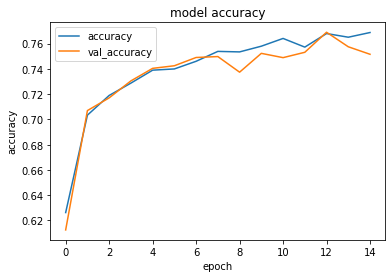

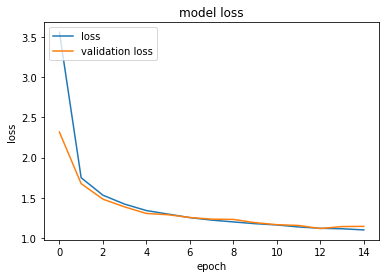

In [ ]:
# accuracy plot 
plt.plot(VGG19_history.history['accuracy'])
plt.plot(VGG19_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

# loss plot
plt.plot(VGG19_history.history['loss'])
plt.plot(VGG19_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

##5)ResNet 50

ResNet architecture is a combination of Residual Blocks so you can stack more blocks to make it deeper

ResNet50 is a variant of ResNet model which has 48 Convolution layers along with 1 MaxPool and 1 Average Pool layer.

Skip connections are shortcut connections which skip few convolutional layers to resolve vanishing gradient problem.

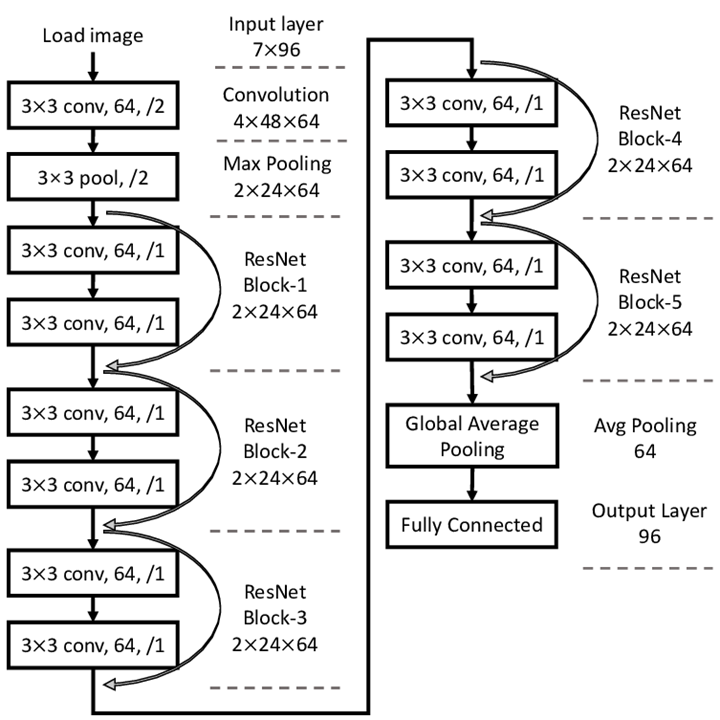


In [ ]:
# Split the train and validation sets 
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.4, random_state=SEED)

In [ ]:
print('X train shape',X_train.shape)
print('Y train shape',Y_train.shape)
print('X val shape',X_val.shape)
print('Y val shape',Y_val.shape)

X train shape (12383, 64, 64, 3)
Y train shape (12383, 15)
X val shape (8256, 64, 64, 3)
Y val shape (8256, 15)


In [ ]:
ResNet50_base_model = ResNet50(
    weights="imagenet",  # load weights pretrained on the ImageNet
    input_shape=(224, 224, 3),
    include_top=False  # do not include the ImageNet classifier at the top
) 

In [ ]:
ResNet50_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# Freeze the base_model
ResNet50_base_model.trainable = False

# Create new model on top
inputs = Input(shape=(224, 224, 3))

#Adding layers
x = ResNet50_base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(1024,activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5))(x)
x = Dense(512,activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5))(x)
x = Dense(128,activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5))(x)
x = BatchNormalization()(x)
x = Dense(64,activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5))(x)
x = Dense(32,activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5))(x)
x = Dropout(0.5)(x)  # Regularize with dropout

#multi output
outputs = Dense(15,activation='softmax')(x)

#Optimizer: Adam
ResNet50_model = Model(inputs, outputs, name='pretrained_mobilenet')
optimizer = Adam(lr=0.002)
ResNet50_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

ResNet50_model.summary()

Model: "pretrained_mobilenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 128)      

In [ ]:
#Adding callbacks and 50 epochs
annealer = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1)
checkpoint = ModelCheckpoint('ResNat50.h5', verbose=1, save_best_only=True)

epochs = 50

#Fit model with 64 batches
ResNet50_history = ResNet50_model.fit(X_train, Y_train,batch_size =64,
               epochs=epochs,
               verbose=1,
               callbacks=[annealer,checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/50
194/194 [==============================] - ETA: 0s - loss: 2.5829 - accuracy: 0.3321WARNING:tensorflow:Model was constructed with shape (None, 224, 224, 3) for input Tensor("input_2:0", shape=(None, 224, 224, 3), dtype=float32), but it was called on an input with incompatible shape (64, 64, 64, 3).

Epoch 00001: val_loss improved from inf to 2.70818, saving model to ResNat50.h5
194/194 [==============================] - 9s 49ms/step - loss: 2.5829 - accuracy: 0.3321 - val_loss: 2.7082 - val_accuracy: 0.2576
Epoch 2/50
193/194 [============================>.] - ETA: 0s - loss: 2.0725 - accuracy: 0.4520
Epoch 00002: val_loss improved from 2.70818 to 2.00348, saving model to ResNat50.h5
194/194 [==============================] - 8s 42ms/step - loss: 2.0726 - accuracy: 0.4519 - val_loss: 2.0035 - val_accuracy: 0.4798
Epoch 3/50
192/194 [============================>.] - ETA: 0s - loss: 1.9155 - accuracy: 0.4965
Epoch 00003: val_loss improved from 2.00348 to 1.81733, saving model

In [ ]:
#calculating model accuracy
print("[INFO] Calculating model accuracy")
scores = ResNet50_model.evaluate(X_val, Y_val)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
258/258 [==============================] - 4s 15ms/step - loss: 1.3105 - accuracy: 0.6715
Test Accuracy: 67.15116500854492


Here we collect the history, returned from training the model and creates two charts:

1)A plot of accuracy on the training and validation datasets over training epochs.

2)A plot of loss on the training and validation datasets over training epochs

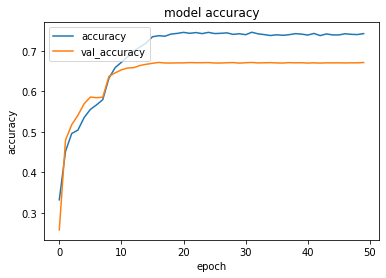

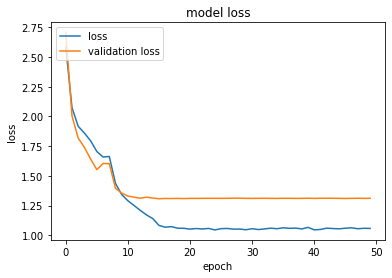

In [ ]:
# accuracy plot 
plt.plot(ResNet50_history.history['accuracy'])
plt.plot(ResNet50_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

# loss plot
plt.plot(ResNet50_history.history['loss'])
plt.plot(ResNet50_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

#References
https://www.ijert.org/plant-disease-detection-using-cnn-model-and-image-processing

https://towardsdatascience.com/plant-ai-plant-disease-detection-using-convolutional-neural-network-9b58a96f2289

https://www.pluralsight.com/guides/introduction-to-densenet-with-tensorflow

